In [1]:
import numpy as np
import numpy.linalg as linalg

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image # pip install pillow

In [2]:
img = Image.open('attface.jpg').convert(mode='L')
img = np.array(img) # np.asarray(img)
m, n = img.shape

nh, nw = 4, 10  # 40 faces
height = m//nh
width = n//nw
height, width # (width, height):each face size

(57, 47)

In [3]:
face = np.empty_like(img).reshape(nh,nw, -1)
for i in range(nh):
    for j in range(nw):
        y = i*height
        x = j*width       
        face[i,j,:] = img[y:y+height, x:x+width].flatten()
face = face.reshape(40, -1)
face.shape

(40, 2679)

In [4]:
# AAt
mFace = np.mean(face, axis = 0) 
A = face - mFace
AAt = np.dot(A, A.T) # 40 x 40

aat_w, U = linalg.eigh(AAt)
# decending order by reverse
aat_w = aat_w[::-1] 
U = U[:, ::-1]
aat_w.shape, U.shape

((40,), (40, 40))

In [5]:
# V is the EigenFace
V = np.dot(A.T, U) 
V = V / np.linalg.norm(V, axis=0).reshape(1, -1) # unit vector
V.shape

(2679, 40)

In [6]:
Y = np.dot(A, V)  # PCA projection

Vk =  V.copy()
k  = 10 # 20, 30, 39
aat_w[aat_w<0] = 0 # aat_w> 0 but numerically, it will be < 0
ratio = np.sum(aat_w[:k])/np.sum(aat_w)
print("Approximation:{}%".format(round(ratio*100)))

Vk[:, k:] = 0
facek = np.dot(Y, Vk.T) + mFace # PCA backprojection

Approximation:79.0%


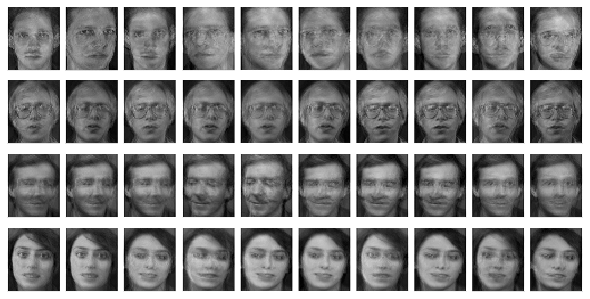

In [7]:
fig, ax = plt.subplots(nh, nw, figsize=(8,4))
for k in range(nh*nw):
    i = k// 10
    j = k % 10
    ax[i, j].axis('off')
    ax[i, j].imshow(facek[k].reshape(height, width), cmap='gray')
fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                   hspace = 0.1, wspace = 0.1)
plt.show()